# Восстановление золота из руды

## 1. Подготовьте данные

### 1.1. Откройте файлы и изучите их.


In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
data_train = pd.read_csv('/final_files/gold_recovery_train_new.csv')
data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

#data_train = pd.read_csv('/opt/anaconda3/gold_recovery_train_new.csv')
#data_test = pd.read_csv('/opt/anaconda3/gold_recovery_test_new.csv')
#data_full = pd.read_csv('/opt/anaconda3/gold_recovery_full_new.csv')


In [3]:
data_train.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [4]:
data_test.head(10)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


In [5]:
data_full.head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [8]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


### 1.2. Проверить, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.


In [9]:
data_train_veri = data_train.drop(['date'], axis=1)
data_train_veri = data_train_veri.dropna(axis=1)


# Убирем из ДС столбец date, так как он имеет не подходящий формат для обучения
# Убирем из ДС пропуски, так как они мешают обучению

target_train_veri = data_train_veri['rougher.output.recovery']
features_train_veri = data_train_veri.drop(['rougher.output.recovery'], axis=1)

model = RandomForestRegressor(n_estimators=100, 
    max_depth=25, random_state=12345)
model.fit(features_train_veri, target_train_veri)
predicted_train_veri = model.predict(features_train_veri)
predicted_train_veri.shape

(14149,)

In [10]:
target_full_veri = data_train['rougher.output.recovery']
target_full_veri.shape

(14149,)

In [11]:

mae = mean_absolute_error(target_full_veri, predicted_train_veri)
print(mae) #необходимо сравнивать две одинаковые по размеру выборки -4.0

0.16212623991860894


In [12]:
target_full_veri.mean()

82.70450164550293

In [13]:
result = mae / (target_full_veri.mean() / 100)
print(result)

0.19603073193468012


В среднем мы ошибаемся на 0,16 условные еденицы в эффективности обогощения чернового концентрата. От среднего значения это составляет 0,19%.
На мой взгляд погрешность не существенная, можем считать что эффективность обогащения рассчитана верно.

### 1.3. Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [14]:
full_cols = data_full.columns
test_cols = data_test.columns
full_not_test = full_cols.difference(test_cols)
print(full_not_test)
                                                                      
                                                                      
                                                                      

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'roughe

По типу данных все данные - float

По содержанию:
4 финальных характеристик параметра продукта в части концентрации золота, серебра, свинца, коллоидного раствора

финальнная характеристик параметра продукта в части восстановления

4 финальных характеристик параметра продукта в части отвальных хвостов золота, серебра, свинца, коллоидного раствора

4 характеристики продукта после первичной очистки в части концентрации золота, серебра, свинца, коллоидного раствора

4 характеристики продукта после первичной очистки в части отвальных хвостов золота, серебра, свинца, коллоидного раствора

Рассчетная характеристика соотношения золота и свинца на этапе флотации

2 Рассчетные характеристики флотационной установки 10 и 11 в части преобразования сульфатов в золото на этапе флотации

Рассчетная характеристика золото-сульфатного концентрата

4 Рассчетные характеристики концентрации золота, серебра, свинца, коллоидного раствора на этапе флотации

Рассчетная характеристика восстановления на этапе флотации

4 Рассчетные характеристики в части отвальных хвостов золота, серебра, свинца, коллоидного раствора на этапе флотации

4 параметра продукта на этапе вторичной очистки в части отвальных хвостов золота, серебра, свинца, коллоидного раствора




### 1.4. Проведите предобработку данных.

In [15]:
data_full.duplicated().sum()

0

In [16]:
data_test.duplicated().sum()

0

In [17]:
data_train.duplicated().sum()

0

Дублирование данных отсутствует

In [18]:
pd.set_option('display.max_rows',None)
data_full.isna().sum()


date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     1
final.output.tail_pb                                   101
final.output.tail_sol                                    6
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           24
primary_cleaner.input.depressant                        37
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         104
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                  116
primary_cleaner.output.concentrate_sol                 3

Будем считать что предел допустимой погрешности в части кол-ва пропусков - 3% от массива данных. В данном случает только столбец
secondary_cleaner.output.tail_sol выходит за пределы допустимой погрешности. Заменим пропуски на медианное значение по столбцу

In [19]:
data_full['secondary_cleaner.output.tail_sol'] = data_full['secondary_cleaner.output.tail_sol'].interpolate(method='nearest')
data_full = data_full.dropna()

In [20]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17390 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                17390 non-null  object 
 1   final.output.concentrate_ag                         17390 non-null  float64
 2   final.output.concentrate_pb                         17390 non-null  float64
 3   final.output.concentrate_sol                        17390 non-null  float64
 4   final.output.concentrate_au                         17390 non-null  float64
 5   final.output.recovery                               17390 non-null  float64
 6   final.output.tail_ag                                17390 non-null  float64
 7   final.output.tail_pb                                17390 non-null  float64
 8   final.output.tail_sol                               17390 non-null  float64


In [21]:
data_test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

In [22]:
data_test = data_test.dropna()

In [23]:
data_train.isna().sum()



date                                                     0
final.output.concentrate_ag                              1
final.output.concentrate_pb                              1
final.output.concentrate_sol                           211
final.output.concentrate_au                              0
final.output.recovery                                    0
final.output.tail_ag                                     0
final.output.tail_pb                                   100
final.output.tail_sol                                    5
final.output.tail_au                                     0
primary_cleaner.input.sulfate                           20
primary_cleaner.input.depressant                        32
primary_cleaner.input.feed_size                          0
primary_cleaner.input.xanthate                         100
primary_cleaner.output.concentrate_ag                    0
primary_cleaner.output.concentrate_pb                   86
primary_cleaner.output.concentrate_sol                 2

На тренеровочной выборке столбцы secondary_cleaner.output.tail_sol, rougher.state.floatbank10_e_air и rougher.input.floatbank11_xanthate
выходят за пределы 3% погрешности.

In [24]:
data_train['secondary_cleaner.output.tail_sol'] = data_train['secondary_cleaner.output.tail_sol'].interpolate(method='nearest')
data_train['rougher.state.floatbank10_e_air'] = data_train['rougher.state.floatbank10_e_air'].interpolate(method='nearest')
data_train['rougher.input.floatbank11_xanthate'] = data_train['rougher.input.floatbank11_xanthate'].interpolate(method='nearest')

In [25]:
data_train = data_train.dropna()

Пропуски убраны! Теперь поработаем с типом данных. Необходимо изменить только столбец date. При обучении модели в дальнейшем столбец с датой будет нам мешать! Можем избавиться от него!

In [26]:
#data_train['date'] = data_train['date'].astype('datetime64[s]')
#data_test['date'] = data_test['date'].astype('datetime64[s]')
#data_full['date'] = data_full['date'].astype('datetime64[s]')

data_full = data_full.drop(['date'], axis=1)
data_train = data_train.drop(['date'], axis=1)
data_test = data_test.drop(['date'], axis=1)

Вывод:

На входе мы имеем довольно большой массив данных, его обработка и визуализация затруднены, это стоит учитывать на будущее. Эффективность обогащения на этапе флотации рассчитана верно! На неё можно ориентироваться.

На тестовой выборке не доступны часть целевых параметров! В такой конфигруации её нельзя будет полноценно использовать в моделе. Необходимо обратить внимание лиц, предоставляющих данные на это.

При проведении прдобработки был выявлено значимое кол-во пропусков. Проблем решена, но это могло повлиять на точность работы модели и функции. Необходимо обратить внимание руководителя на этот момент.

## 2. Проанализируйте данные

### 2.1. Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

У нас есть 4 этапа очистки: Флотация, первый этап, второй и финальный концентрат. Возьмем медианное значение массива по этим металлам и по этапам для сравнения.
Данные о концентрации на втором этапе отсутствуют! Вероятно они не замеряются по технологическим причинам.

In [27]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17390 entries, 0 to 19438
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         17390 non-null  float64
 1   final.output.concentrate_pb                         17390 non-null  float64
 2   final.output.concentrate_sol                        17390 non-null  float64
 3   final.output.concentrate_au                         17390 non-null  float64
 4   final.output.recovery                               17390 non-null  float64
 5   final.output.tail_ag                                17390 non-null  float64
 6   final.output.tail_pb                                17390 non-null  float64
 7   final.output.tail_sol                               17390 non-null  float64
 8   final.output.tail_au                                17390 non-null  float64


Поэтапное изменение концентрации свинца


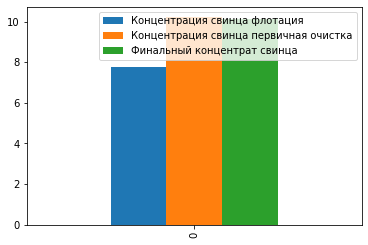

In [28]:
#final.output.concentrate_pb концентрация свинца финальный
#primary_cleaner.output.concentrate_pb концентрация свинца первичная очистка
#rougher.output.concentrate_pb концентрация свинца флотация

final_pb = data_full['final.output.concentrate_pb'].median()
prim_pb = data_full['primary_cleaner.output.concentrate_pb'].median()
roug_pb = data_full['rougher.output.concentrate_pb'].median()
d_pb = {'Концентрация свинца флотация': [roug_pb], 'Концентрация свинца первичная очистка': [prim_pb], 'Финальный концентрат свинца': [final_pb]}
conc_dynam_pb = pd.DataFrame(data=d_pb)
conc_dynam_pb.plot(kind='bar')
print('Поэтапное изменение концентрации свинца')


Распределение концентрации свинца на этапе флотации


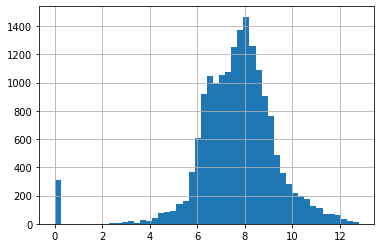

In [29]:
print('Распределение концентрации свинца на этапе флотации')
data_full['rougher.output.concentrate_pb'].hist(bins=50);

Распределение концентрации свинца на этапе первичной очистки


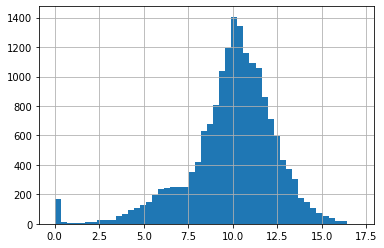

In [30]:
print('Распределение концентрации свинца на этапе первичной очистки')
data_full['primary_cleaner.output.concentrate_pb'].hist(bins=50);

Распределение концентрации свинца на финальном этапе


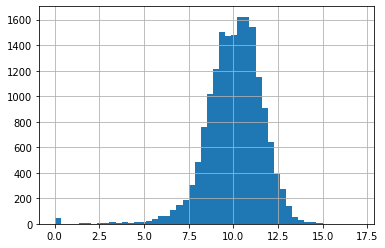

In [31]:
print('Распределение концентрации свинца на финальном этапе')
data_full['final.output.concentrate_pb'].hist(bins=50);

Поэтапное изменение концентрации золота


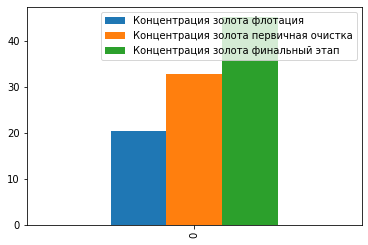

In [32]:
#final.output.concentrate_au концентрация золота финальный
#primary_cleaner.output.concentrate_au концентрация золота первичная очистка
#rougher.output.concentrate_au концентрация золота флотация

final_au = data_full['final.output.concentrate_au'].median()
prim_au = data_full['primary_cleaner.output.concentrate_au'].median()
roug_au = data_full['rougher.output.concentrate_au'].median()
d_au = {'Концентрация золота флотация': [roug_au], 'Концентрация золота первичная очистка': [prim_au], 'Концентрация золота финальный этап': [final_au]}

conc_dynam_au = pd.DataFrame(data=d_au)
print('Поэтапное изменение концентрации золота')
conc_dynam_au.plot(kind='bar');

Распределение концентрации золота на этапе флотации


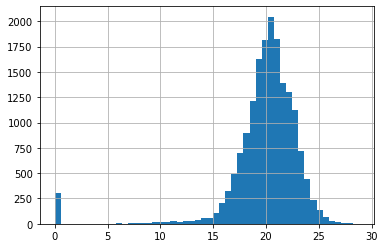

In [33]:
print('Распределение концентрации золота на этапе флотации')
data_full['rougher.output.concentrate_au'].hist(bins=50);

Распределение концентрации золота на этапе первичной очистки


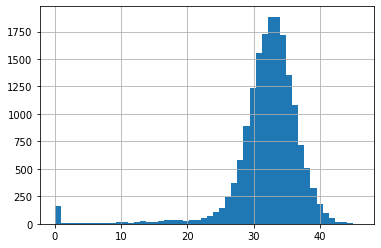

In [34]:
print('Распределение концентрации золота на этапе первичной очистки')
data_full['primary_cleaner.output.concentrate_au'].hist(bins=50);

Распределение концентрации золота на финальном этапе


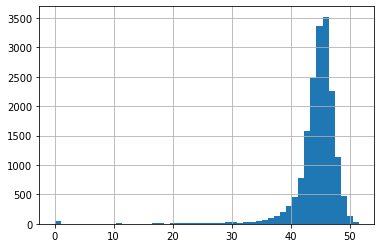

In [35]:
print('Распределение концентрации золота на финальном этапе')
data_full['final.output.concentrate_au'].hist(bins=50);

Поэтапное изменение концентрации серебра


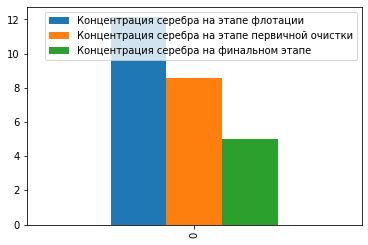

In [36]:
#final.output.concentrate_au концентрация серебра финальный
#primary_cleaner.output.concentrate_au концентрация серебра первичная очистка
#rougher.output.concentrate_au концентрация серебра флотация

final_ag = data_full['final.output.concentrate_ag'].median()
prim_ag = data_full['primary_cleaner.output.concentrate_ag'].median()
roug_ag = data_full['rougher.output.concentrate_ag'].median()
d_ag = {'Концентрация серебра на этапе флотации': [roug_ag], 'Концентрация серебра на этапе первичной очистки': [prim_ag], 'Концентрация серебра на финальном этапе': [final_ag]}
conc_dynam_ag = pd.DataFrame(data=d_ag)
print('Поэтапное изменение концентрации серебра')
conc_dynam_ag.plot(kind='bar');

Распределение концентрации серебра на этапе флотации


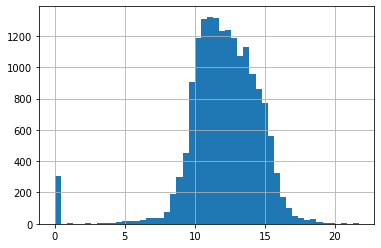

In [37]:
print('Распределение концентрации серебра на этапе флотации')
data_full['rougher.output.concentrate_ag'].hist(bins=50);

Распределение концентрации серебра на этапе первичной очистки


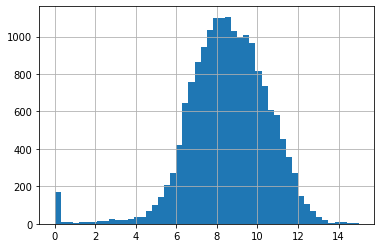

In [38]:
print('Распределение концентрации серебра на этапе первичной очистки')
data_full['primary_cleaner.output.concentrate_ag'].hist(bins=50);

Распределение концентрации серебра на финальном этапе


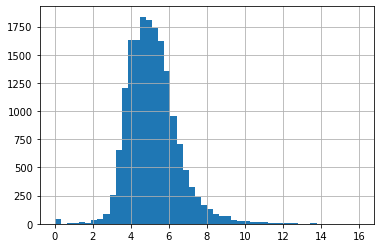

In [39]:
print('Распределение концентрации серебра на финальном этапе')
data_full['final.output.concentrate_ag'].hist(bins=50);

Интересно! Получается из первичного сырья на этапе флотации больше всего концентрация золота! 

Далее на первом этапе очистки концентрация золота существенно увеличивается, как и концентрация свинца, а вот серебро уменьшается в результате очистки.

На финальном этапе концентрация золота увеличивается в тех же темпах, свинец чуть снижается а серебро уходит к показателям ниже 50% от изначальной концентрации.

### 2.2. Сравниваем распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

Распределение гранул сырья на тестовой выборке:


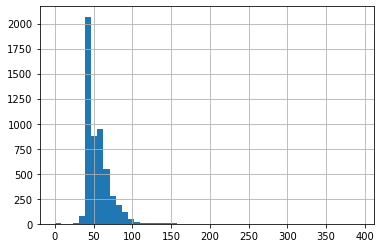

In [40]:
data_test['rougher.input.feed_size'].hist(bins=50);
print('Распределение гранул сырья на тестовой выборке:')

Распределение гранул сырья на обучающей выборке


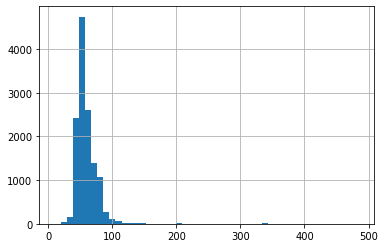

In [41]:
data_train['rougher.input.feed_size'].hist(bins=50);
print('Распределение гранул сырья на обучающей выборке')

In [42]:
size_mean_train = data_train['rougher.input.feed_size'].mean()
print('Средний размер гранул сырья на обучающей выборке:', size_mean_train)

size_mean_test = data_test['rougher.input.feed_size'].mean()
print('Средний размер гранул сырья на тестовой выборке:', size_mean_test)

Средний размер гранул сырья на обучающей выборке: 59.740282533412746
Средний размер гранул сырья на тестовой выборке: 55.86397810255099


На мой взглят модели похожи по структуре, распределение отличается не сильно! Средний размер гранул сырья так же не сильно отличается.

### 2.3. Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

Для реализации этой задачи необходимо полнять архитектуру данных! В строках мы получаем данные о технологическом процессе в моменте, соответсвенно две соседние строки могут выдавать практически одинаковый результат в случае если разниться по времени снятия данных не велика.

Наша задача сравнить концентрацию веществ на разных стадиях, можем суммировать концентрацию 4х веществ на каждой стадии и сравнивать медианы между собой.

In [43]:
data_full_count = data_full
data_full_count['roug_sum'] = data_full_count['rougher.output.concentrate_au'] + data_full_count['rougher.output.concentrate_ag'] + data_full_count['rougher.output.concentrate_pb'] + data_full_count['rougher.output.concentrate_sol']
roug_sum_med = data_full_count['roug_sum'].median()

In [44]:
data_full_count['prim_sum'] = data_full_count['primary_cleaner.output.concentrate_au'] + data_full_count['primary_cleaner.output.concentrate_ag'] + data_full_count['primary_cleaner.output.concentrate_pb'] + data_full_count['primary_cleaner.output.concentrate_sol']
prim_sum_med = data_full_count['prim_sum'].median()

In [45]:
data_full_count['final_sum'] = data_full_count['final.output.concentrate_au'] + data_full_count['final.output.concentrate_ag'] + data_full_count['final.output.concentrate_pb'] + data_full_count['final.output.concentrate_sol']
final_sum_med = data_full_count['final_sum'].median()

Поэтапное изменение концентрации всех веществ


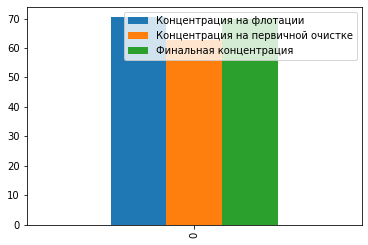

In [46]:
d_con = {'Концентрация на флотации': [roug_sum_med], 'Концентрация на первичной очистке': [prim_sum_med], 'Финальная концентрация': [final_sum_med]}
conc_sum = pd.DataFrame(data=d_con)
print('Поэтапное изменение концентрации всех веществ')
conc_sum.plot(kind='bar');

Распределение суммарной концентрации на флотации


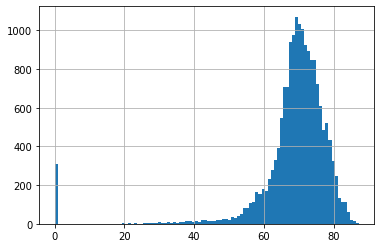

In [47]:
data_full_count['roug_sum'].hist(bins=100);
print('Распределение суммарной концентрации на флотации')

Распределение суммарной концентрации на первичной очистке


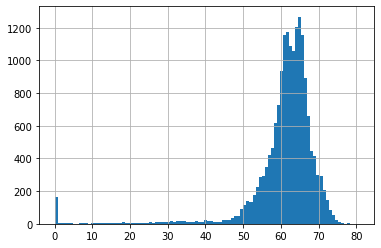

In [48]:
data_full_count['prim_sum'].hist(bins=100);
print('Распределение суммарной концентрации на первичной очистке')

Распределение суммарной концентрации на финальном этапе


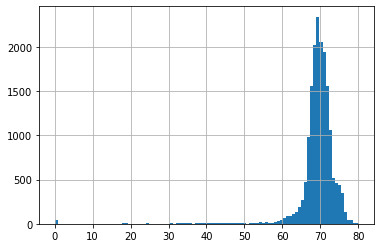

In [49]:
data_full_count['final_sum'].hist(bins=100);
print('Распределение суммарной концентрации на финальном этапе')

Вывод:

Итак, мы видим не линейную динамику распределения суммарной концентрации вещество по этапам.
По логике распределение должно быть линейным, так как мы «вымываем» лишние вещества.
По факту суммарная концентрация на этапе флотации примерна равна суммарной финальной концентрации.

С точки зрения распределения суммарных концентраций – на флотации мы видим нормальное распределение вокруг 70 у.е.
На первичной очистке – вокруг 65, на финале – узкое распределение вокруг 70. Вопросы к флотации

Объяснение простое – в отличии от концентрации золота и свинца, концентрация серебра уменьшается к финалу, а не увеличивается. Это компенсирует суммарную концентрацию остальных металлов, что в итоге даёт не линейное изменение суммарной концентрации.


### 3. Постройте модель

### 3.1. Пишем функцию для вычисления итоговой sMAPE.

In [50]:
def count_smape(roug_act, roug_pred, fin_act, fin_pred):
    roug_smape = 100/len(roug_act) * np.sum(2 * np.abs(roug_pred - roug_act) / (np.abs(roug_act) + np.abs(roug_pred)))
    final_smape = 100/len(fin_act) * np.sum(2 * np.abs(fin_pred - fin_act) / (np.abs(fin_act) + np.abs(fin_pred)))
    total_smape = 0,25 * roug_smape + 0,75 * final_smape
    return total_smape

### 3.2. Обучаем разные модели и оцениваем их качество кросс-валидацией. Выбераем лучшую модель и проверяем её на тестовой выборке. 

In [51]:
#data_full = data_full.drop(['date'], axis=1)
features = data_full.drop(['rougher.output.recovery'], axis=1)
target = data_full['rougher.output.recovery']


model = DecisionTreeRegressor(random_state=0)



In [52]:
scores_dt = cross_val_score(model, features, target, cv=10)

In [53]:


final_score_dt = sum(scores_dt) / len(scores_dt)
print('Средняя оценка качества модели "Древо решений в регресии": {:.3f}'.format(final_score_dt))

Средняя оценка качества модели "Древо решений в регресии": 0.876


In [54]:

model_2 = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=0)



In [55]:
scores_rf_1 = cross_val_score(model_2, features, target, cv=10)
final_score_rf_1 = sum(scores_rf_1) / len(scores_rf_1)
print('Средняя оценка качества модели "Случайный лес в регресии": {:.3f}'.format(final_score_rf_1))

Средняя оценка качества модели "Случайный лес в регресии": 0.941


In [56]:
model_3 = RandomForestRegressor(n_estimators=5, max_depth=10, random_state=0)
scores_rf_2 = cross_val_score(model_3, features, target, cv=10)
final_score_rf_2 = sum(scores_rf_2) / len(scores_rf_2)
print('Средняя оценка качества модели "Случайный лес в регресии": {:.3f}'.format(final_score_rf_2))

Средняя оценка качества модели "Случайный лес в регресии": 0.935


In [57]:
model_4 = RandomForestRegressor(n_estimators=15, max_depth=10, random_state=0)
scores_rf_3 = cross_val_score(model_3, features, target, cv=10)
final_score_rf_3 = sum(scores_rf_3) / len(scores_rf_3)
print('Средняя оценка качества модели "Случайный лес в регресии": {:.3f}'.format(final_score_rf_3))

Средняя оценка качества модели "Случайный лес в регресии": 0.935


In [58]:
model_5 = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=0)
scores_rf_4 = cross_val_score(model_5, features, target, cv=10)
final_score_rf_4 = sum(scores_rf_4) / len(scores_rf_4)
print('Средняя оценка качества модели "Случайный лес в регресии": {:.3f}'.format(final_score_rf_3))

Средняя оценка качества модели "Случайный лес в регресии": 0.935


In [59]:
model_6 = RandomForestRegressor(n_estimators=10, max_depth=15, random_state=0)
scores_rf_5 = cross_val_score(model_6, features, target, cv=10)
final_score_rf_5 = sum(scores_rf_5) / len(scores_rf_5)
print('Средняя оценка качества модели "Случайный лес в регресии": {:.3f}'.format(final_score_rf_3))

Средняя оценка качества модели "Случайный лес в регресии": 0.935


Оптимальные гиперпараметры:

n_estimators=10

max_depth=15

In [60]:

model_1 = LinearRegression()

scores = cross_val_score(model_1, features, target, cv=10)
final_score = sum(scores) / len(scores)
print('Средняя оценка качества модели:', final_score)

Средняя оценка качества модели: 0.2621385107143187


Исходя из текущих данных стоит выбрать модель случайный лес в регресии

In [61]:


roug_features_full = data_full.drop(['rougher.output.recovery'], axis=1)
roug_target_full = data_full['rougher.output.recovery']
#У нас есть возможность обучить модель на полной выборке, или на тренеровочной! На тестовой исходные данные отсутствуют.
#Данные для работы функции берем с трен. выборки, обучаем модель на полной.



In [62]:
roug_features_full = roug_features_full.drop(['roug_sum'], axis=1)
roug_features_full = roug_features_full.drop(['prim_sum'], axis=1)
roug_features_full = roug_features_full.drop(['final_sum'], axis=1)

In [63]:
model = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=12345) 

model.fit(roug_features_full, roug_target_full)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=12345,
                      verbose=0, warm_start=False)

In [64]:
roug_target_train = data_train['rougher.output.recovery']
#roug_target_train - Реальные показатели по rougher.output.recovery

In [65]:
roug_features_train = data_train.drop(['rougher.output.recovery'], axis=1)

roug_predictions = model.predict(roug_features_train)
#roug_predictions - Предсказанные показатели rougher.output.recovery

In [66]:
final_features_full = data_full.drop(['final.output.recovery'], axis=1)
final_target_full = data_full['final.output.recovery']

In [67]:
final_features_full = final_features_full.drop(['roug_sum'], axis=1)
final_features_full = final_features_full.drop(['prim_sum'], axis=1)
final_features_full = final_features_full.drop(['final_sum'], axis=1)

In [68]:
model_4 = RandomForestRegressor(n_estimators=10, max_depth=10, random_state=12345) 

model_4.fit(final_features_full, final_target_full)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=12345,
                      verbose=0, warm_start=False)

In [69]:
final_target_train = data_train['final.output.recovery']
#roug_target_train - Реальные показатели по final.output.recovery

In [70]:
final_features_train = data_train.drop(['final.output.recovery'], axis=1)

final_predictions = model.predict(final_features_train)
#final_predictions - Предсказанные показатели final.output.recovery

В функцию нужно передать:

Реальные показатели по rougher.output.recovery

Предсказанные показатели rougher.output.recovery

Реальные показатели final.output.recovery

Предсказанные показатели final.output.recovery

In [71]:
result = count_smape(roug_target_train, roug_predictions, final_target_train, final_predictions)

In [72]:
print(result)

(0, 21.875917089806432, 1864.7408412633893)


#### Вывод

Проект выполненен! 

На входе мы имеем довольно большой массив данных, его обработка и визуализация затруднены, это стоит учитывать на будущее. Эффективность обогащения на этапе флотации рассчитана верно! На неё можно ориентироваться.

На тестовой выборке не доступны часть целевых параметров! В такой конфигруации её нельзя будет полноценно использовать в моделе. Необходимо обратить внимание лиц, предоставляющих данные на это.

При проведении прдобработки был выявлено значимое кол-во пропусков. Проблем решена, но это могло повлиять на точность работы модели и функции. Необходимо обратить внимание руководителя на этот момент.

На этапе анализ данных мы видим  4 этапа очистки: Флотация, первый этап, второй и финальный концентрат. Возьмем медианное значение массива по этим металлам и по этапам для сравнения.
Данные о концентрации на втором этапе отсутствуют! Вероятно они не замеряются по технологическим причинам.

Наблюдаем что из первичного сырья на этапе флотации больше всего концентрация золота! 

Далее на первом этапе очистки концентрация золота существенно увеличивается, как и концентрация свинца, а вот серебро уменьшается в результате очистки.

На финальном этапе концентрация золота увеличивается в тех же темпах, свинец чуть снижается а серебро уходит к показателям ниже 50% от изначальной концентрации.

Мы видим не линейную динамику распределения суммарной концентрации вещество по этапам.
По логике распределение должно быть линейным, так как мы «вымываем» лишние вещества.
По факту суммарная концентрация на этапе флотации примерна равна суммарной финальной концентрации.

С точки зрения распределения суммарных концентраций – на флотации мы видим нормальное распределение вокруг 70 у.е.
На первичной очистке – вокруг 65, на финале – узкое распределение вокруг 70. Вопросы к флотации

Объяснение простое – в отличии от концентрации золота и свинца, концентрация серебра уменьшается к финалу, а не увеличивается. Это компенсирует суммарную концентрацию остальных металлов, что в итоге даёт не линейное изменение суммарной концентрации.


При выборе модели для обучения мы проверили разные модели, а так же вариации гиперпараметров и остановились на модели RandomForestRegressor с параметрами
n_estimators=10

max_depth=15

Обучение модели для двух ключевых показателях проведено на обучающей выборке. Данные переданы в функцию для подсчёта sMAPE. Результат готов.
